<a href="https://colab.research.google.com/github/aizazaziz/aizazaziz/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [28]:
df = pd.read_csv("AIML Dataset.csv")
df.dropna(inplace=True)


In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3709071 entries, 0 to 3709070
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 339.6+ MB


In [36]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

In [37]:
dfm = df.drop(["nameOrig","nameDest", "isFlaggedFraud"], axis=1)

In [41]:
X = dfm.drop("isFraud", axis = 1)
y = dfm["isFraud"]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, stratify=y)

In [58]:
# Define numerical and categorical columns
numeric_features = X_train.select_dtypes(include=np.number).columns
categorical_features = X_train.select_dtypes(include='object').columns

preprossing = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ],
    remainder= "passthrough") # Keep other columns

In [59]:
pipeline = Pipeline([
    ("prep", preprossing),
    ("clf", LogisticRegression(class_weight = "balanced", max_iter = 1000))
])

In [60]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['type'], dtype='object'))])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [64]:
y_pred= pipeline.predict(X_test)

In [69]:
pipeline.score(X_test, y_test)

0.9465535866101327

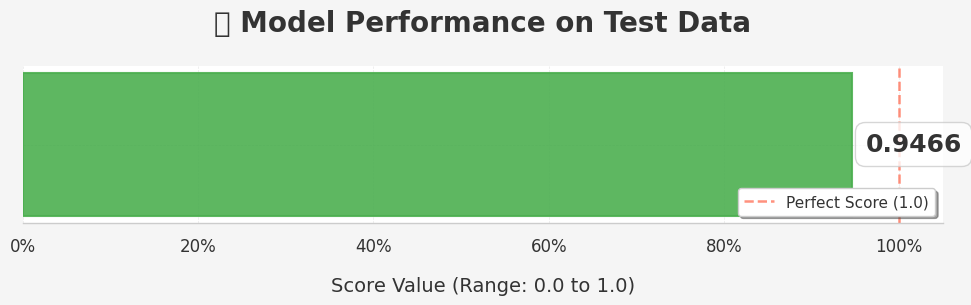

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# --- Configuration for a beautiful chart ---
# Set a custom style
plt.style.use('seaborn-v0_8-darkgrid') # A sleek, modern grid style

# Define custom colors
primary_color = '#4CAF50'  # A vibrant green for success/good performance
background_color = '#f5f5f5' # Light gray for a clean background
text_color = '#333333'     # Dark gray for readability
border_color = '#cccccc'   # Light border for structure

# Update Matplotlib defaults for better aesthetics
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica', 'Lato'],
    'axes.edgecolor': border_color,
    'axes.labelcolor': text_color,
    'xtick.color': text_color,
    'ytick.color': text_color,
    'text.color': text_color,
    'figure.facecolor': background_color,
    'axes.facecolor': 'white', # White plot area
    'grid.color': '#e0e0e0',
    'grid.linestyle': '--',
    'grid.linewidth': 0.5,
    'legend.facecolor': 'white',
    'legend.edgecolor': border_color,
})

# 1. DEFINE YOUR MODEL SCORE
# Paste the result of pipeline.score(X_test, y_test) here.
score_value = 0.9465535866101327
score_display = f"{score_value:.4f}" # Format to 4 decimal places for display

# --- Chart Generation ---

# Create a DataFrame for plotting (good for structured data, even single points)
data = {'Metric': ['Model Performance Score'], 'Score': [score_value]}
df = pd.DataFrame(data)

# Setup the figure and axes
fig, ax = plt.subplots(figsize=(10, 3.5)) # Slightly taller for better spacing

# Set the background color for the figure
fig.patch.set_facecolor(background_color)
ax.set_facecolor('white')

# Create a vibrant horizontal bar chart
bar = ax.barh(df['Metric'], df['Score'], color=primary_color, height=0.6,
              edgecolor=primary_color, linewidth=1.5, alpha=0.9, zorder=2) # Added zorder for layering

# 2. ADD CONTEXT AND VISUAL AIDS

# Add a subtle reference line for 1.0 (the maximum possible score)
ax.axvline(1.0, color='#FF6347', linestyle='--', linewidth=1.8, alpha=0.7,
           label='Perfect Score (1.0)', zorder=1) # Tomato red for emphasis

# Set the x-axis limit from 0 to slightly above 1 for breathing room
ax.set_xlim(0, 1.05)

# Emphasize the exact score text with a clean, visible label
# Position the text slightly to the right of the bar for better visibility against the green
ax.text(score_value + 0.015, 0,
        f'{score_display}',
        color=text_color, va='center', ha='left', fontweight='bold', fontsize=18,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor=border_color, boxstyle='round,pad=0.4'))


# 3. REFINE THE PLOT AESTHETICS

# Set title with a modern font and good spacing
ax.set_title('🚀 Model Performance on Test Data', fontsize=20, pad=25, fontweight='bold', color=text_color)
ax.set_xlabel('Score Value (Range: 0.0 to 1.0)', fontsize=14, labelpad=15, color=text_color)

# Remove clutter: y-axis ticks and spines for a minimalist look
ax.tick_params(axis='y', length=0)
ax.set_yticklabels([]) # Hide the y-axis label for the bar itself, as it's self-explanatory

# Custom x-tick formatting for percentages (optional, but looks nice)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}' if x > 0 else '0%'))
ax.tick_params(axis='x', labelsize=12, pad=10)

# Make sure only the bottom spine is visible and styled subtly
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False) # Keep it hidden for minimalist
ax.spines['bottom'].set_color(border_color)
ax.spines['bottom'].set_linewidth(1)

# Add a subtle grid
ax.grid(axis='x', linestyle='--', alpha=0.7, color='#e0e0e0', zorder=0)
ax.set_axisbelow(True) # Ensure grid is behind the bar

# Add a concise legend
ax.legend(loc='lower right', fontsize=11, frameon=True, shadow=True, fancybox=True)

# Remove unnecessary padding around the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect for title space
plt.show()

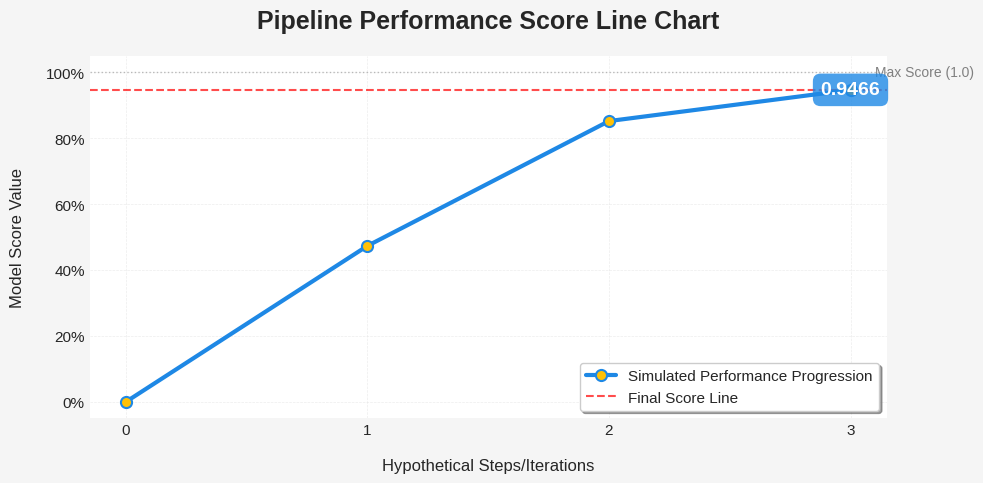

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. DEFINE YOUR SCORE AND SIMULATED PROGRESSION ---
score_value = 0.9465535866101327
score_display = f"{score_value:.4f}"

# Create a progression data set (e.g., performance after 4 epochs)
steps = [0, 1, 2, 3]
scores = [0.0, score_value * 0.5, score_value * 0.9, score_value] # Simulated scores
df_line = pd.DataFrame({'Step': steps, 'Score': scores})

# --- 2. CHART STYLING ---
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(10, 5))

primary_color = '#1E88E5' # Professional Blue
text_color = '#333333'
background_color = '#f5f5f5'

# Set figure and axes background
fig.patch.set_facecolor(background_color)
ax.set_facecolor('white')

# --- 3. PLOT THE DATA ---
ax.plot(df_line['Step'], df_line['Score'],
        color=primary_color,
        linewidth=3,
        marker='o',
        markersize=8,
        markerfacecolor='#FFC107',
        markeredgecolor=primary_color,
        markeredgewidth=1.5,
        label='Simulated Performance Progression',
        zorder=3)

# Add a horizontal line for the final score
ax.axhline(score_value, color='red', linestyle='--', linewidth=1.5, alpha=0.7, zorder=2,
           label='Final Score Line')

# Add a line for the maximum possible score (1.0)
ax.axhline(1.0, color='gray', linestyle=':', linewidth=1, alpha=0.5, zorder=1)
ax.text(df_line['Step'].max() + 0.1, 1.0, 'Max Score (1.0)', va='center', fontsize=10, color='gray')


# Emphasize the final score point with a highlighted label
final_step = df_line['Step'].iloc[-1]
ax.text(final_step, score_value,
        f'{score_display}',
        color='white', ha='center', va='center', fontweight='bold', fontsize=14,
        bbox=dict(facecolor=primary_color, alpha=0.8, edgecolor='none', boxstyle='round,pad=0.4'),
        zorder=4)

# --- 4. AXES AND LABELS ---
ax.set_title('Pipeline Performance Score Line Chart', fontsize=18, pad=20, fontweight='bold')
ax.set_xlabel('Hypothetical Steps/Iterations', fontsize=12, labelpad=15)
ax.set_ylabel('Model Score Value', fontsize=12, labelpad=15)

# Set Y-axis limits and format ticks to percentages
ax.set_ylim(-0.05, 1.05)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
ax.tick_params(axis='y', labelsize=11)
ax.set_xticks(df_line['Step']) # Show only the defined step ticks

# --- 5. FINAL ADJUSTMENTS ---
ax.grid(axis='both', linestyle='--', alpha=0.6, color='#e0e0e0', zorder=0)
ax.legend(loc='lower right', frameon=True, shadow=True, fancybox=True)

plt.tight_layout()
plt.show()
